In [1]:
#Notebook used to plot measurements from the SkySim5000+IA mocks vs theory predictions
%pylab inline
import pylab as plt
import numpy as np
import treecorr
#import matplotlib as plt
path_treecorr='correlations/'
path_nicaea='predictions_nicaea/'
from astropy.io import fits

Populating the interactive namespace from numpy and matplotlib


Working on bins 1 1


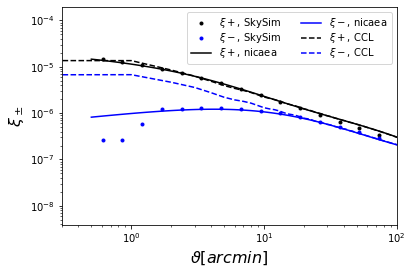

Working on bins 1 2


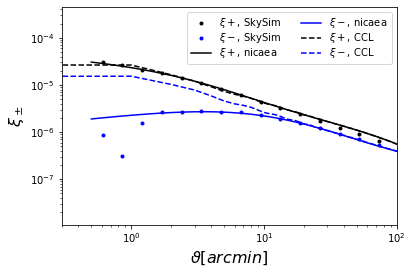

Working on bins 1 3


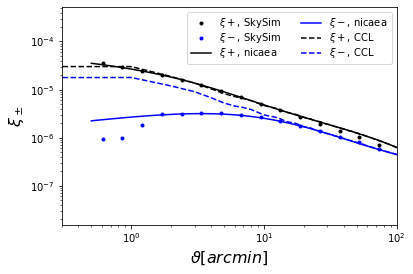

Working on bins 1 4


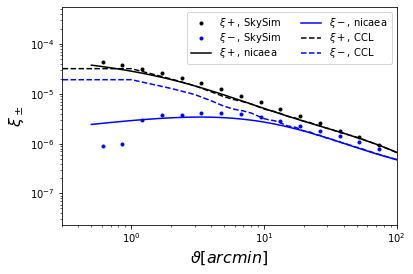

Working on bins 1 5


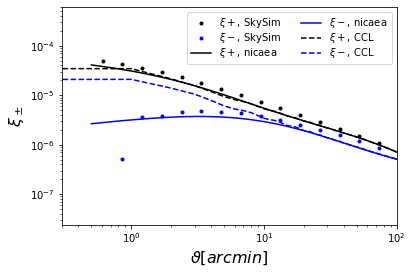

Working on bins 2 2


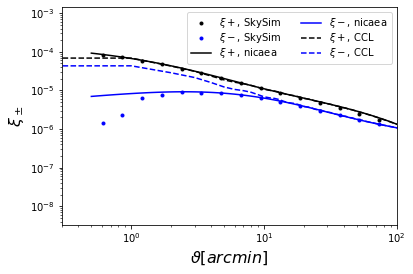

Working on bins 2 3


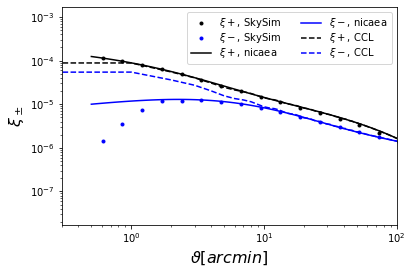

Working on bins 2 4


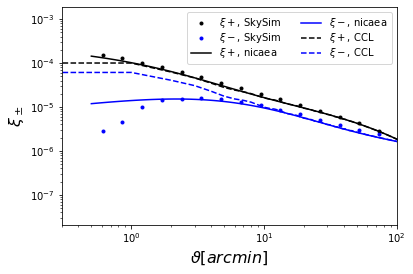

Working on bins 2 5


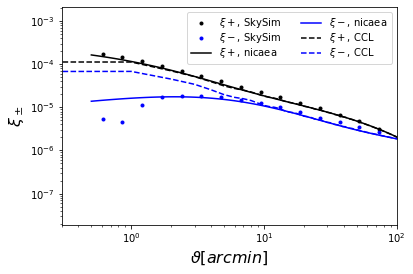

Working on bins 3 3


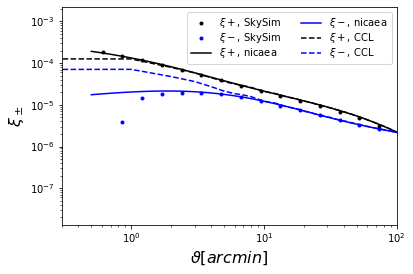

Working on bins 3 4


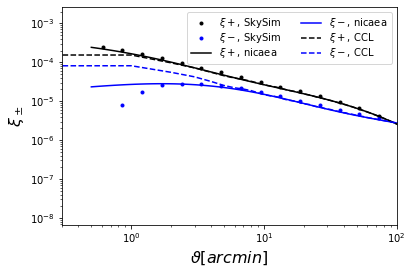

Working on bins 3 5


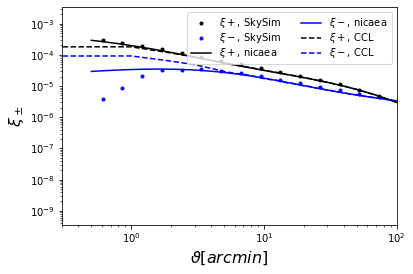

Working on bins 4 4


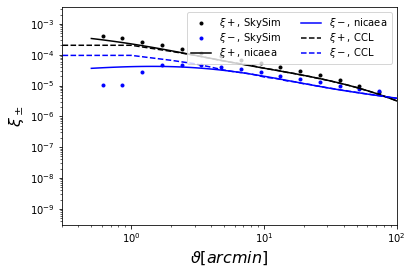

Working on bins 4 5


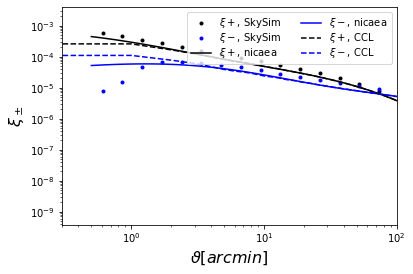

Working on bins 5 5


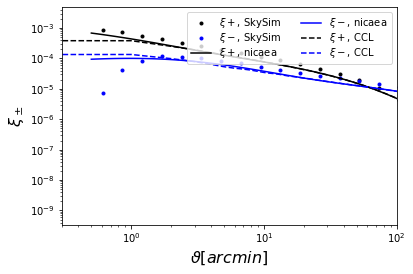

In [9]:
# Load the CCL predictions:
hdul = fits.open('theo_prediction.fits')
data=hdul[1].data
NO_IA_plus=data['NO IA+'] # Xi + (no ia)
NO_IA_minus=data['NO IA-'] # Xi - (no ia)
GI_plus=data['GI+']        #GI + (TATT) 
GI_minus=data['GI-']       #GI - (TATT)
GI_NLA_plus=data['GI_NLA+']  #GI + (NLA),
GI_NLA_minus=data['GI_NLA-']  #GI - (NLA)
II_plus=data['II+']           #II + (TATT) 
II_minus=data['II-']         #II -   (TATT)
II_NLA_plus=data['II_NLA+']  #II +   (NLA)
II_NLA_minus=data['II_NLA-']     #II -  (NLA)
theta=data['theta']            # Angular separation(s) in arcmin
z_combination=data['bin_comb']  #redshift bin combination 

# Load the Treecorr measurements:
counter=0
xip=np.empty([20,15])
xim=np.empty([20,15])

for bin1 in np.arange(5)+1:
    for bin2 in range (bin1,6):
    #for bin2 in range (bin1,6):

        
        print('Working on bins', bin1, bin2)
        
        # Get Treecorr measurements
        filename=path_treecorr+'cross_correlation_tomo{}_{}'.format(bin1,bin2)
        #print('Opening ',filename)
        #gg = treecorr.GGCorrelation(nbins = 9, min_sep = 0.00833333, max_sep = 7.925, bin_slop = 0.01) 
        #gg = treecorr.GGCorrelation(nbins = 20, min_sep = 0.03333333, max_sep = 1.66666667, bin_slop = 0.01) 
        gg = treecorr.GGCorrelation(nbins = 20, min_sep=0.5, max_sep=475.5, sep_units='arcmin',bin_slop=0.01)
        
        gg.read(filename)
        xip[:,counter]=gg.xip
        xim[:,counter]=gg.xim
        theta=gg.meanr
        #theta=gg.meanr*60*60

        
        
        #Get xi+ theory (nicaea)
        file_nicaea=np.loadtxt(path_nicaea+'xip_StageIV_bin{}_bin{}.dat'.format(bin1,bin2))
        theta_nicaea=file_nicaea[:,0]
        xip_nicaea=file_nicaea[:,2]

        #Get xi- theory (nicaea)
        file_nicaea=np.loadtxt(path_nicaea+'xim_StageIV_bin{}_bin{}.dat'.format(bin1,bin2))
        xim_nicaea=file_nicaea[:,2]

        #Get theory (CCL)
        # Find the right column:
        for tomo in range(0,15):
            if(z_combination[tomo][0]==bin2 and z_combination[tomo][1]==bin1 ):
                #print(z_combination[tomo][0], z_combination[tomo][1])
                #print("Will use column",tomo)
                break
        theta_CCL=data['theta']
        theta_CCL=theta_CCL[0,:]
        xip_CCL=NO_IA_plus[tomo,:]
        xim_CCL=NO_IA_minus[tomo,:]

        
        counter +=1
        
        #plt.plot(theta, 4*np.pi*gg.xip, 'k.', label='$\\xi+$, SkySim')
        #plt.plot(theta, 4*np.pi*gg.xim, 'b.', label='$\\xi-$, SkySim')

        plt.plot(theta, gg.xip, 'k.', label='$\\xi+$, SkySim')
        plt.plot(theta, gg.xim, 'b.', label='$\\xi-$, SkySim')

        plt.plot(theta_nicaea, xip_nicaea, 'k-', label='$\\xi+$, nicaea')
        plt.plot(theta_nicaea, xim_nicaea, 'b-', label='$\\xi-$, nicaea')
        plt.plot(theta_CCL, xip_CCL, 'k--', label='$\\xi+$, CCL')
        plt.plot(theta_CCL, xim_CCL, 'b--', label='$\\xi-$, CCL')
        

        plt.loglog()
        plt.xlabel('$\\vartheta [arcmin]$', fontsize=16)
        plt.ylabel('$\\xi_\\pm$', fontsize=16)
        plt.legend(loc='upper right', ncol=2, labelspacing=0.1)
        plt.xlim([0.3, 100])
        plt.show()

In [36]:
gg.xip

array([ 5.7670e-05,  3.8884e-05,  2.4603e-05,  1.4120e-05,  6.6827e-06,
        2.6541e-06,  7.5673e-07,  5.1537e-07,  6.5484e-07, -1.8738e-07,
       -1.8776e-07, -9.2114e-08, -1.4252e-07, -2.1793e-08,  5.8550e-08,
       -8.9042e-08,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])

In [37]:
gg.meanr*60

array([  0.36918,   0.53034,   0.76182,   1.09434,   1.57194,   2.25786,
         3.24282,   4.6572 ,   6.6876 ,   9.6006 ,  13.7778 ,  19.7586 ,
        28.296  ,  40.3944 ,  57.06   ,  75.756  , 118.218  , 169.818  ,
       243.942  , 350.424  ])